In [65]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, style='darkgrid', palette='Set2')

In [66]:
def centroid(x1, x2):
    return (x1 + x2) / 2

def reflect(x0, xlast, alpha):
    return x0 + alpha * (x0 - xlast)

def expand(x0, xr, gamma):
    return x0 + gamma * (xr - x0)

def contract(x0, xl, delta):
    return x0 + delta * (xl - x0)

def shrink(x1, xi, beta):
    return x1 + beta * (xi - x1)

def NetherMead2D(func, x1, x2, x3, alpha = 1, beta = 1/2, gamma = 2, delta = 1/2, num_iter=1000):
    triangles = [0] * num_iter
    for i in range(num_iter):
        x1, x2, x3 = sorted((x1, x2, x3), key=func)
        triangles[i] = (x1, x2, x3)
        
        x0 = centroid(x1, x2)
        xr = reflect(x0, x3, alpha)
        
        if func(x1) <= func(xr) < f(x2):
            x3 = xr
            # Go to step 1
            continue
        
        if func(xr) < func(x1):
            # Expansion
            xe = expand(x0, xr, gamma)
            if func(xe) < func(xr):
                x3 = xe
            else:
                x3 = xr
            # Go to step 1
            continue
        
        # Contrantion
        xc = contract(x0, x3, delta)
        if func(xc) < func(x3):
            x3 = xc
            # Go to step 1
            continue
        
        # Shrink
        x2 = shrink(x1, x2, beta)
        x3 = shrink(x1, x3, beta)
    return triangles

In [67]:
def f(point):
    x, y = point
    return np.sin(y) * np.exp((1 - np.cos(x)) ** 2) + np.cos(x) * np.exp((1 - np.sin(y)) ** 2) + (x - y) ** 2

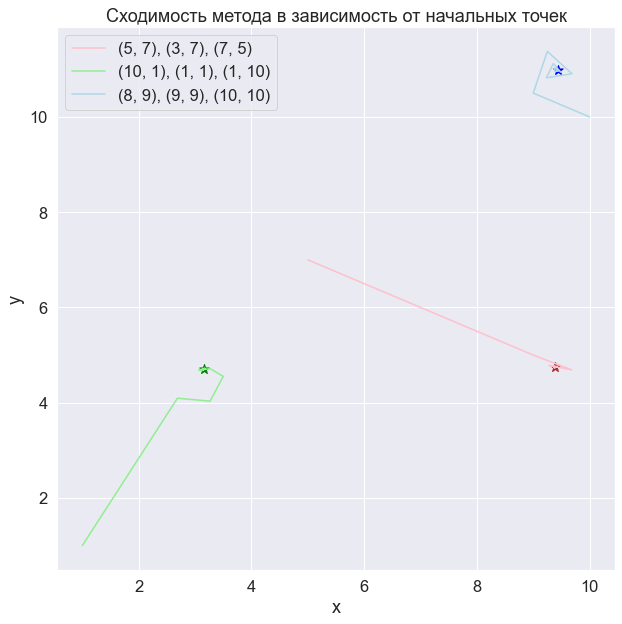

In [77]:
x1, x2, x3 = map(np.array, (
    (5, 7), (3, 7), (7, 5)
))
history = NetherMead2D(f, x1, x2, x3)
history1 = np.array([history[i][0] for i in range(len(history))])

x1, x2, x3 = map(np.array, (
    (10, 1), (1, 1), (1, 10)
))
history = NetherMead2D(f, x1, x2, x3)
history2 = np.array([history[i][0] for i in range(len(history))])

x1, x2, x3 = map(np.array, (
    (8, 9), (9, 9), (10, 10)
))
history = NetherMead2D(f, x1, x2, x3)
history3 = np.array([history[i][0] for i in range(len(history))])

plt.figure(figsize=(10, 10))
plt.plot(history1[:, 0], history1[:, 1], color='pink', label='(5, 7), (3, 7), (7, 5)')
plt.scatter(history1[-1, 0], history1[-1, 1], color='brown', marker='*', s=100)
plt.plot(history2[:, 0], history2[:, 1], color='lightgreen', label='(10, 1), (1, 1), (1, 10)')
plt.scatter(history2[-1, 0], history2[-1, 1], color='green', marker='*', s=100)
plt.plot(history3[:, 0], history3[:, 1], color='lightblue', label='(8, 9), (9, 9), (10, 10)')
plt.scatter(history3[-1, 0], history3[-1, 1], color='blue', marker='*', s=100)
plt.title('Сходимость метода в зависимости от начальных точек')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

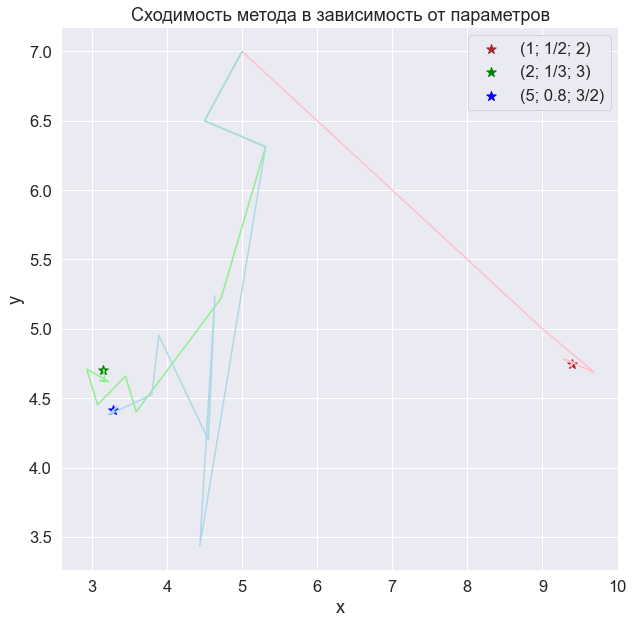

In [76]:
x1, x2, x3 = map(np.array, (
    (5, 7), (3, 7), (7, 5)
))
history = NetherMead2D(f, x1, x2, x3)
history1 = np.array([history[i][0] for i in range(len(history))])

history = NetherMead2D(f, x1, x2, x3, alpha=2, beta=1/3, gamma=3)
history2 = np.array([history[i][0] for i in range(len(history))])

history = NetherMead2D(f, x1, x2, x3, alpha=5, beta=0.8, gamma=3/2)
history3 = np.array([history[i][0] for i in range(len(history))])

plt.figure(figsize=(10, 10))
plt.plot(history1[:, 0], history1[:, 1], color='pink')
plt.scatter(history1[-1, 0], history1[-1, 1], color='brown', marker='*', s=100, label='(1; 1/2; 2)')
plt.plot(history2[:, 0], history2[:, 1], color='lightgreen')
plt.scatter(history2[-1, 0], history2[-1, 1], color='green', marker='*', s=100, label='(2; 1/3; 3)')
plt.plot(history3[:, 0], history3[:, 1], color='lightblue')
plt.scatter(history3[-1, 0], history3[-1, 1], color='blue', marker='*', s=100, label='(5; 0.8; 3/2)')
plt.title('Сходимость метода в зависимости от параметров')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()